## 33장 과제 
### 1번: numpy, scipy library 이용하여 코드 작성
- 코드:python notebook

In [2]:
import numpy as np
from scipy import stats
from scipy.stats import norm

+ 정규분포를 따르는 랜덤 샘플 500개 

In [24]:
np.random.seed(100)
data = np.random.normal(size=500)

+ 중앙값, 표준편차, 상위 20%값

In [23]:
# loc,std= stats.norm.fit(data)
print(" '중앙값 : %f ' is almost '0'" %(np.median(data)))
print(" '표준편차 : %f ' is almost '1'" %(np.std(data)))
print(" '상위 20%' : ", stats.scoreatpercentile(data,80))

 '중앙값 : -0.126519 ' is almost '0'
 '표준편차 : 0.953732 ' is almost '1'
 '상위 20%' :  0.7911038684540467


+ 정규분포로 추측, 평균&표준편차 구하기

In [27]:
loc, std=stats.norm.fit(data)
print('평균 is %f(almost 0) , 표준편차 is %f(almost 1) ' %(loc,std))

평균 is -0.005418(almost 0) , 표준편차 is 1.032801(almost 1) 


### 2번: 행렬 연산
- 코드:python notebook

In [43]:
from scipy import linalg
arr = np.array([[1,3,5],[2,4,6],[6,5,8]])

In [44]:
print('* determinant of arr :', linalg.det(arr))
print('* inverse matrix of arr :\n', linalg.inv(arr))

* determinant of arr : -7.999999999999991
* inverse matrix of arr :
 [[-0.25  -0.125  0.25 ]
 [-2.5    2.75  -0.5  ]
 [ 1.75  -1.625  0.25 ]]


### 3번: 행렬 연산
- 코드:python notebook

In [45]:
from scipy import linalg
arr2 = np.array([[1,2,3,4],[3,8,5,2],[4,3,6,2]])
print("에러가 발생한다.square matrix만 determinant를 구할 수 있음")
print(linalg.det(arr2))


에러가 발생한다.square matrix만 determinant를 구할 수 있음


ValueError: expected square matrix

### 4번: LU decomp 구하기
- 코드:numpy 및 Gaussian 소거법을 이용

In [77]:
A = np.array([[2,2,2],[4,7,7],[6,18,22]])
U = np.identity(3)

In [78]:
np.copyto(U,A)
U[1]=U[1]+(-2)*U[0]

E_21 = np.identity(3)
E_21[1,0] = -2
print('step1 -------------------------')
print('U = \n' + str(U))
print('E_21 = \n' +str(E_21))

print('step2 -------------------------')
U[2]=U[2]+(-3)*U[0]
E_31 = np.identity(3)
E_31[2,0] = -3
print('U = \n' + str(U))
print('E_31 = \n' +str(E_31))

print('step3 -------------------------')
U[2]=U[2]+(-4)*U[1]
E_32 = np.identity(3)
E_32[2,1] = -4
print('U = \n' + str(U))
print('E_32 = \n' +str(E_32))

step1 -------------------------
U = 
[[ 2.  2.  2.]
 [ 0.  3.  3.]
 [ 6. 18. 22.]]
E_21 = 
[[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 0.  0.  1.]]
step2 -------------------------
U = 
[[ 2.  2.  2.]
 [ 0.  3.  3.]
 [ 0. 12. 16.]]
E_31 = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-3.  0.  1.]]
step3 -------------------------
U = 
[[2. 2. 2.]
 [0. 3. 3.]
 [0. 0. 4.]]
E_32 = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -4.  1.]]


In [81]:
E=np.matmul(np.matmul(E_32,E_31),E_21)
L=np.linalg.inv(E)
print('L = \n' + str(L))
print('U = \n' + str(U))
A=np.matmul(L,U)
print('A = \n' + str(A))
#np.array_equal (np.matmul(L,U), A)

L = 
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 4. 1.]]
U = 
[[2. 2. 2.]
 [0. 3. 3.]
 [0. 0. 4.]]
A = 
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


### 5번: LU decomp 구하기
- 코드: scipy.linalg 이용

In [98]:
from scipy import linalg
A = np.array([[2,2,2],[4,7,7],[6,18,22]])

In [102]:
P,L,U = linalg.lu(A)
print('L =  \n' +str(L))
print('U =  \n' +str(U))
print('A =  \n' +str(np.matmul(P,np.matmul(L,U))))

L =  
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]]
U =  
[[ 6.         18.         22.        ]
 [ 0.         -5.         -7.66666667]
 [ 0.          0.          0.8       ]]
A =  
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


### 6번: cos - curved data
- 코드: scipy.optimize이용

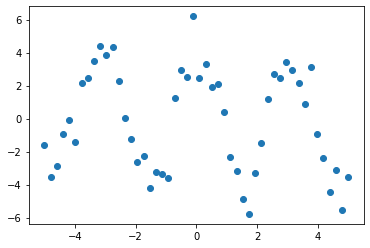

In [109]:
import numpy as np
np.random.seed(0)
x_data = np.linspace(-5, 5, num=50)
y_data = 4 * np.cos(2*x_data) + np.random.normal(size=50)

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)


+ data에 대한 정보없을때 cos과 sin함수 추청

In [111]:
from scipy import optimize
cos_params, cos_params_covariance = optimize.curve_fit( lambda x, a, b : a* np.cos(b*x), x_data, y_data, p0 = [2,2] )
sin_params, sin_params_covariance = optimize.curve_fit( lambda x, a, b : a* np.sin(b*x), x_data, y_data, p0 = [2,2] )

print(cos_params, sin_params)
print("최초에 주어진 값 :진폭=4 , 주기=2 와 가까운 결과는 cos_params")

[3.93165348 2.00961284] [0.37696515 2.39071889]
최초에 주어진 값 :진폭=4 , 주기=2 와 가까운 결과는 cos_params


### 7번: 분포의 기댓값

In [126]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

class1 = [65.9, 53.6, 57.3, 59.3, 63.8, 59.2, 64.2, 75.0, 62.9]
class2 = [76.3, 82.1, 73.3, 69.3, 59.9, 72.1, 59.1, 86.8, 78.1]
loc1, std1 =stats.norm.fit(class1)
loc2, std2 =stats.norm.fit(class2)
print('-------------scipy 이용')
print("Class1의 기댓값: %f, 표준편차: %d" %(loc1, std1))
print("Class2의 기댓값: %f, 표준편차: %d" %(loc2, std2))

print('-------------numpy 이용')
print("Class1의 기댓값: %f, 표준편차: %d" %(np.mean(class1), np.std(class1)))
print("Class2의 기댓값: %f, 표준편차: %d" %(np.mean(class2), np.std(class2)))

-------------scipy 이용
Class1의 기댓값: 62.355556, 표준편차: 5
Class2의 기댓값: 73.000000, 표준편차: 8
-------------numpy 이용
Class1의 기댓값: 62.355556, 표준편차: 5
Class2의 기댓값: 73.000000, 표준편차: 8
